In [63]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PowerTransformer


In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day31-power-transformer/concrete_data.csv')

In [65]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [66]:
X = df.drop('Strength', axis=1)
y = df['Strength']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test) 
r2_score(y_test, y_pred)

0.627553179231485

In [69]:
# cross check
lr = LinearRegression()
np.mean(cross_val_score(lr, X, y, scoring='r2'))

0.4609940491662866

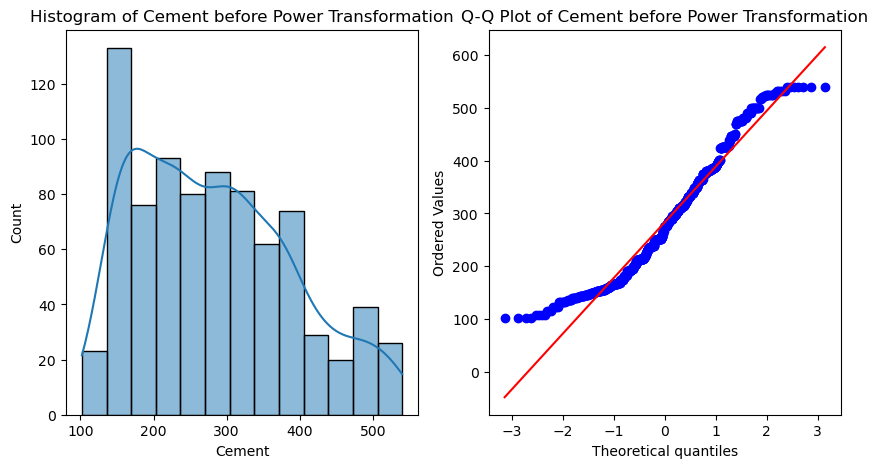

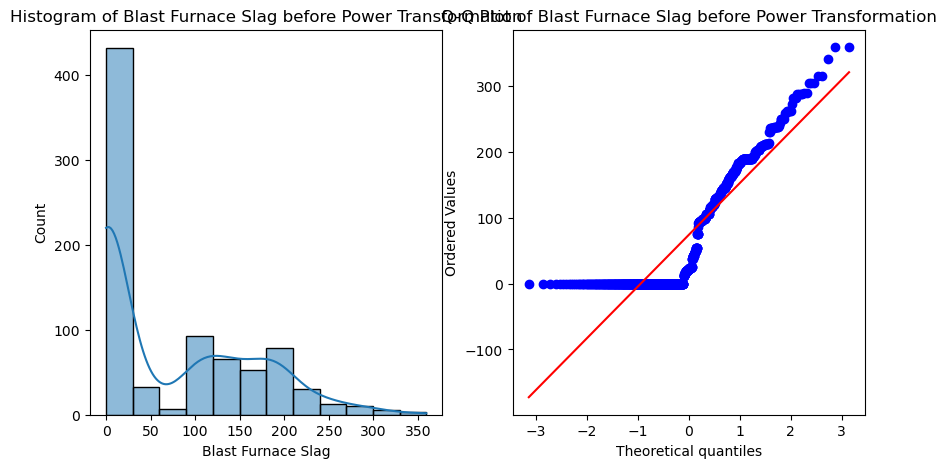

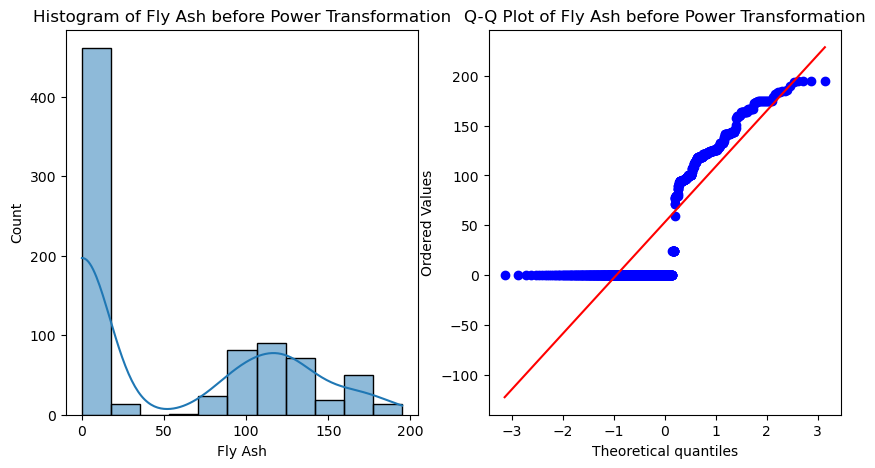

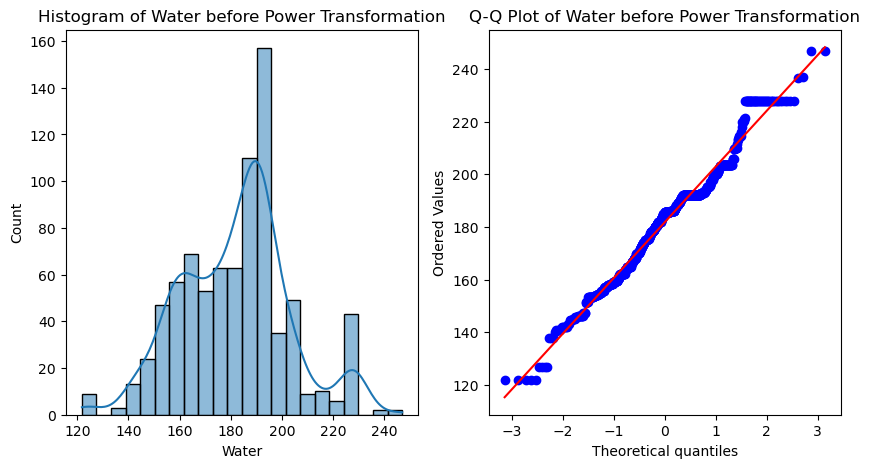

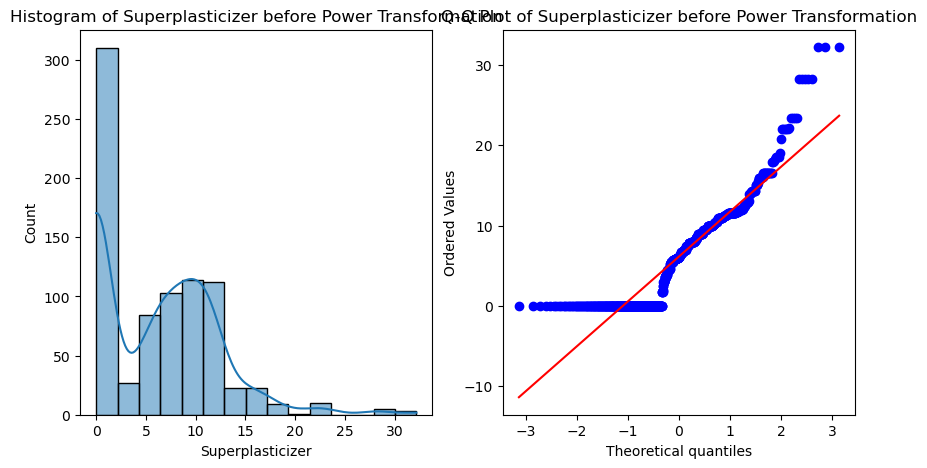

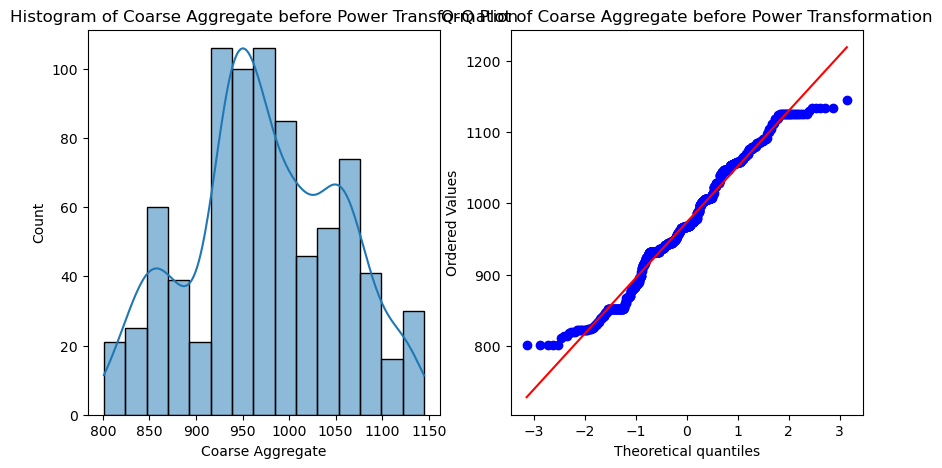

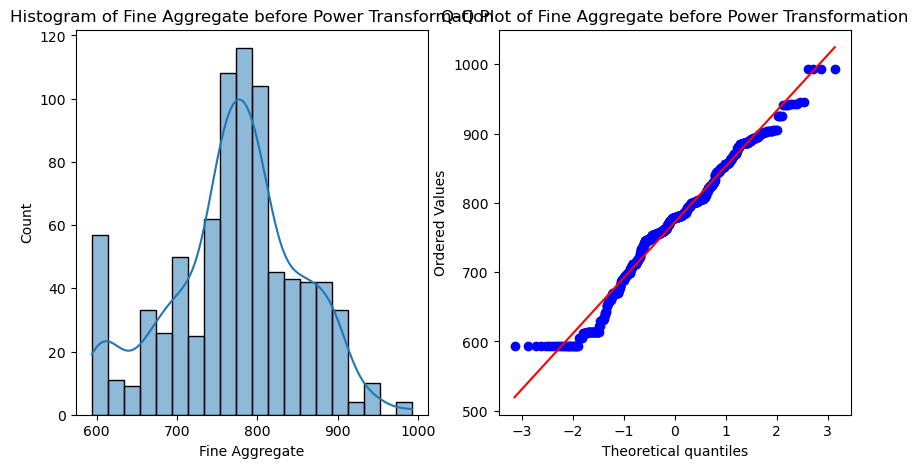

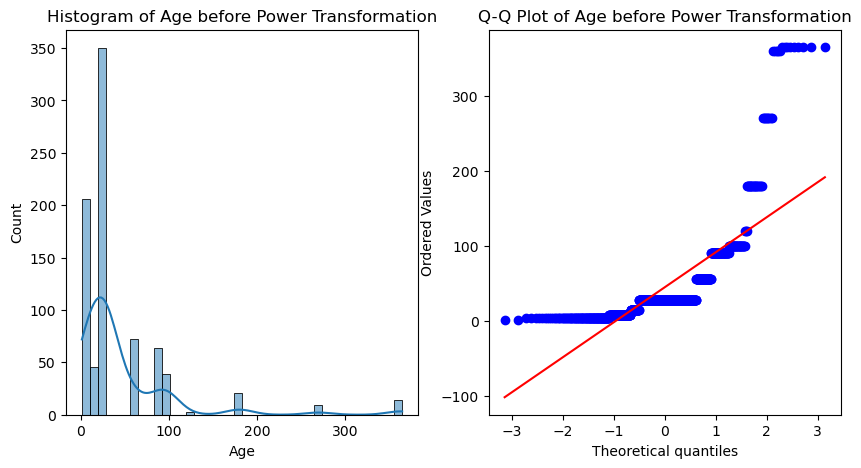

In [70]:
# plot hist without transform

for col in X_train.columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Histogram of {col} before Power Transformation')

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col} before Power Transformation')

    plt.show()

1. good
2. right skewed
3. bimodal
4. good
5. right skewed and bimodal
6. better
7. better
8. bimodal and right skewed

# Box Cox

In [71]:
# internally standard scaler is applied so no need to scale

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({
    'cols': X_train.columns,
    'box_cox_lambdas' : pt.lambdas_   # gives the lambdas optimal for that column
})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [72]:
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)
y_pred2 = lr.predict(X_test_transformed)
r2_score(y_test, y_pred2)


0.8047825011695536

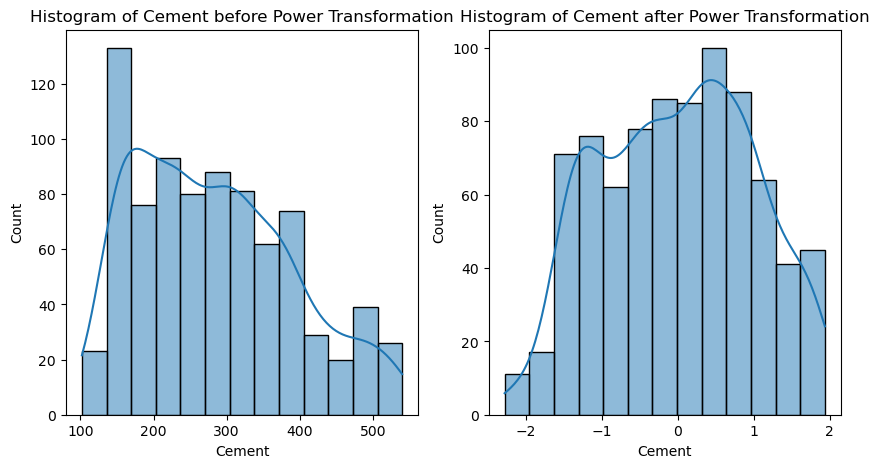

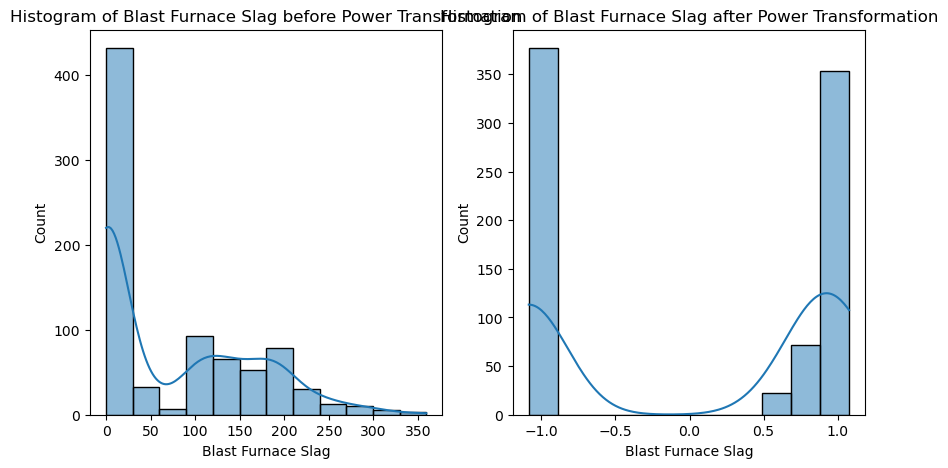

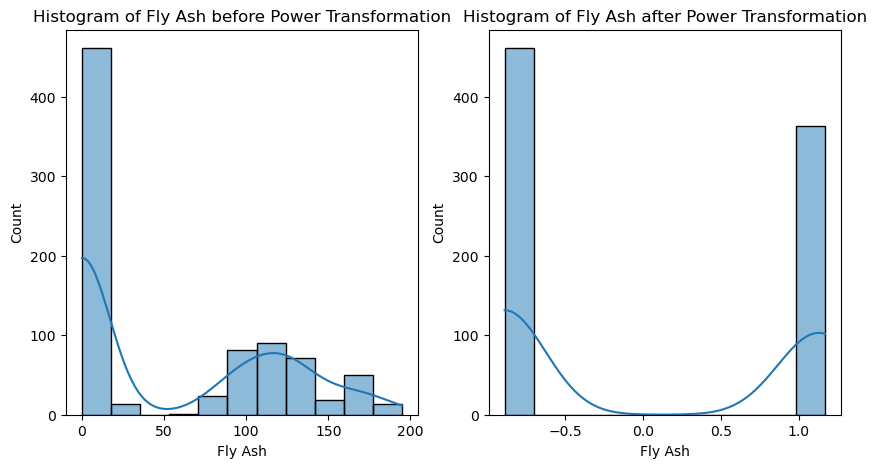

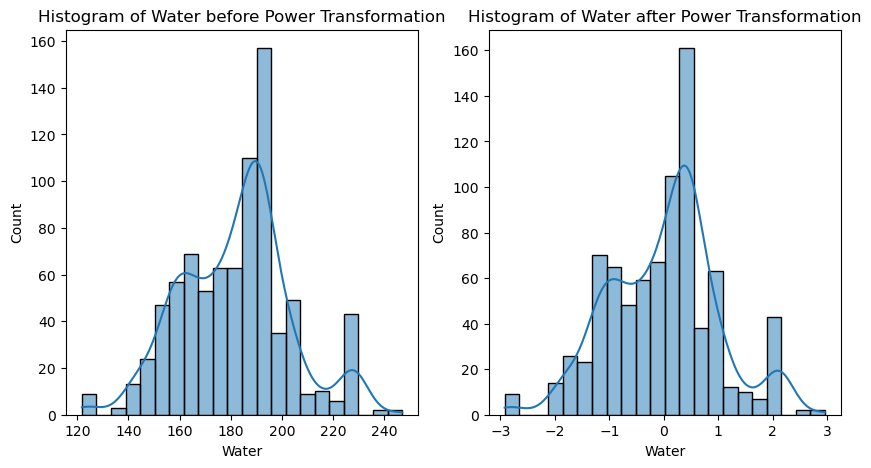

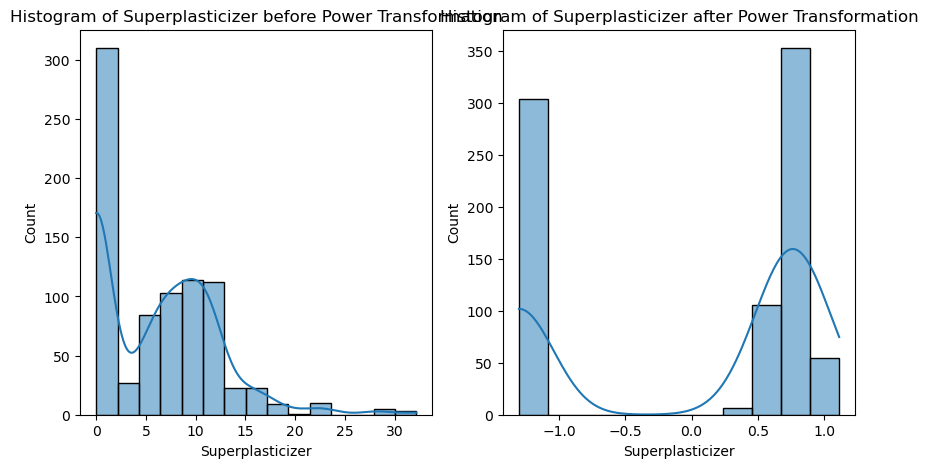

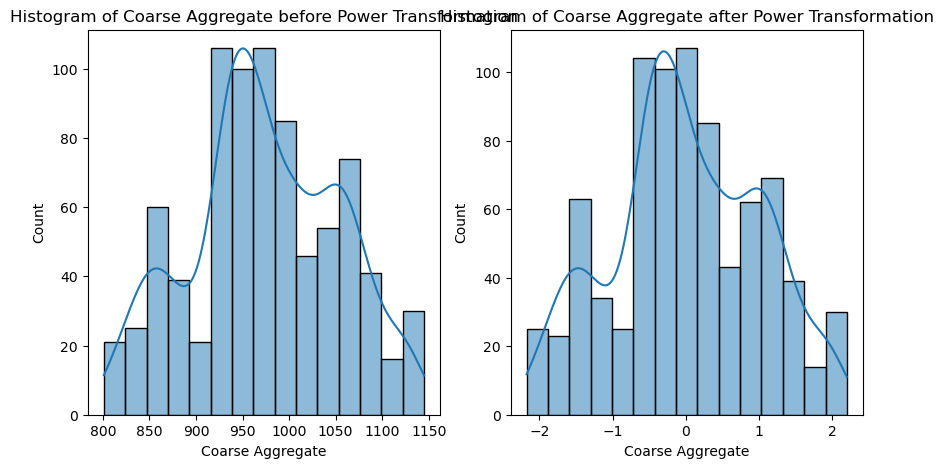

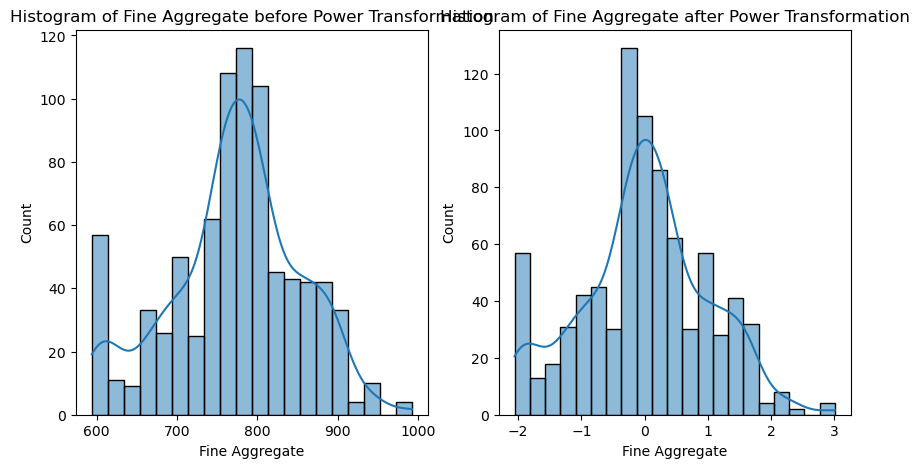

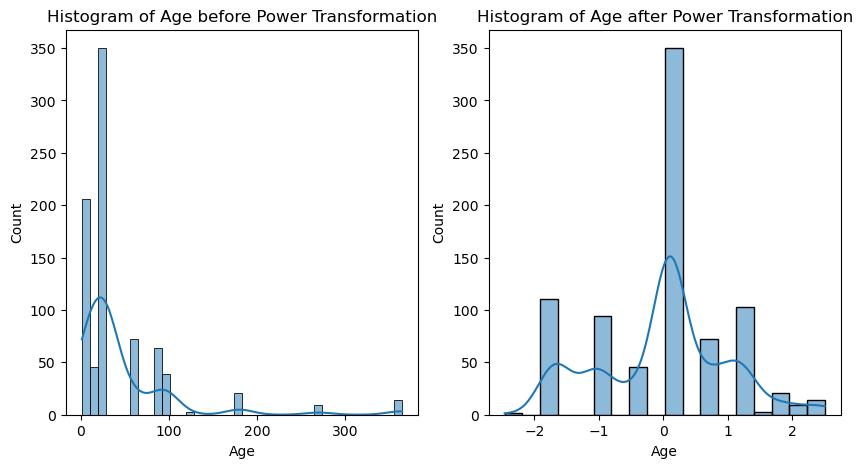

In [73]:
# before and after transform

X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Histogram of {col} before Power Transformation')

    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(f'Histogram of {col} after Power Transformation')

    plt.show()

# Yeo-Johnson

In [ ]:
# internally standard scaler is applied so no need to scale

pt1 = PowerTransformer(method='yeo-johnson')

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2, y_train)
y_pred3 = lr.predict(X_test_transformed2)
print(r2_score(y_test, y_pred3))

pd.DataFrame({
    'cols': X_train.columns,
    'yeo_johnson_lambdas' : pt1.lambdas_   # gives the lambdas optimal for that column
})

0.8161906513354853


,cols,yeo_johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [75]:
pt1 = PowerTransformer()
X_transformed2 = pt1.fit_transform(X_train)

lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed2, y_train, scoring='r2'))

0.7941782182452174

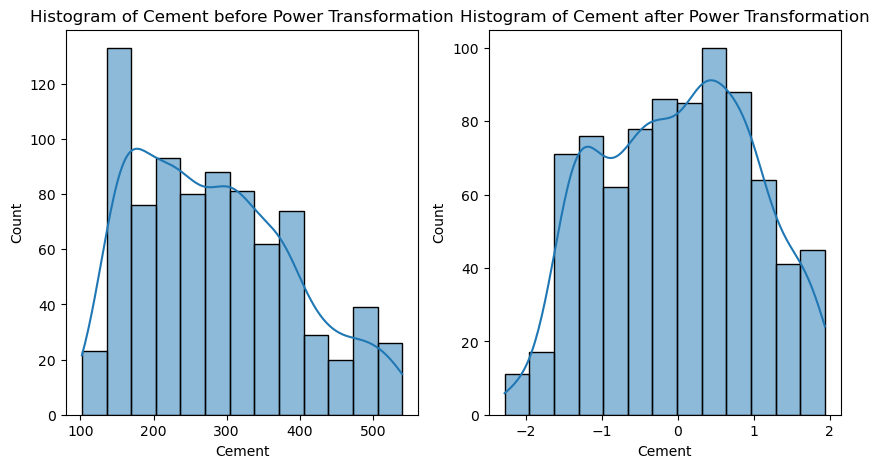

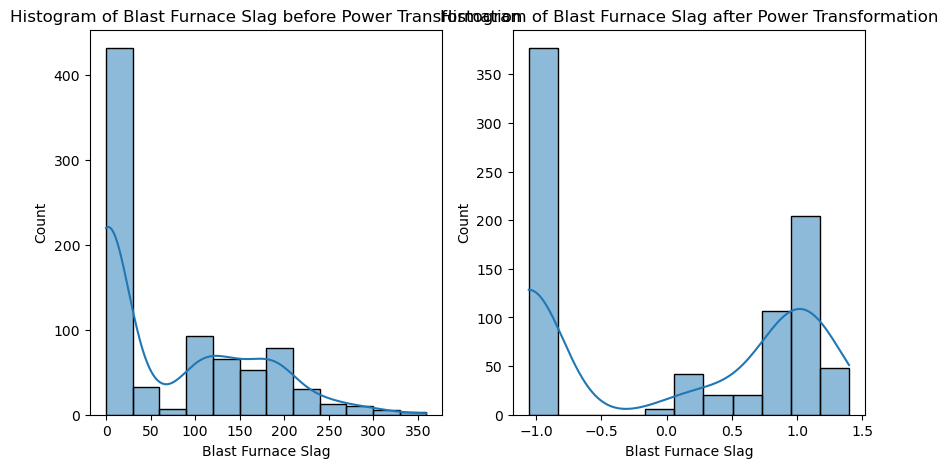

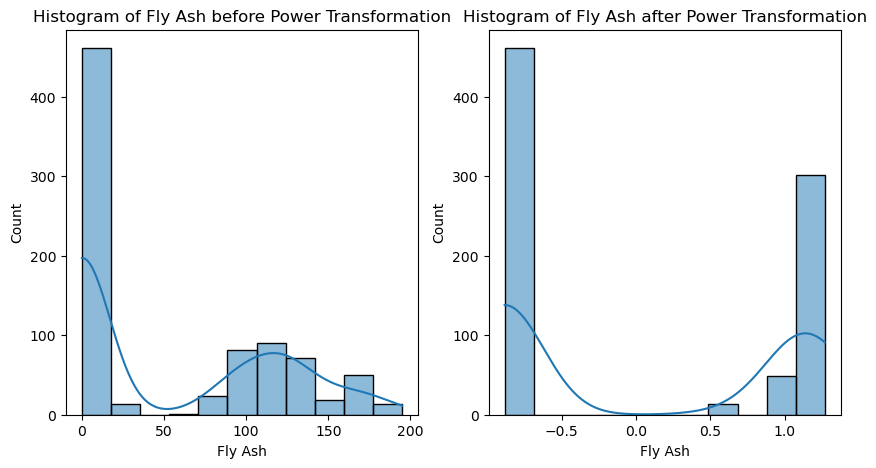

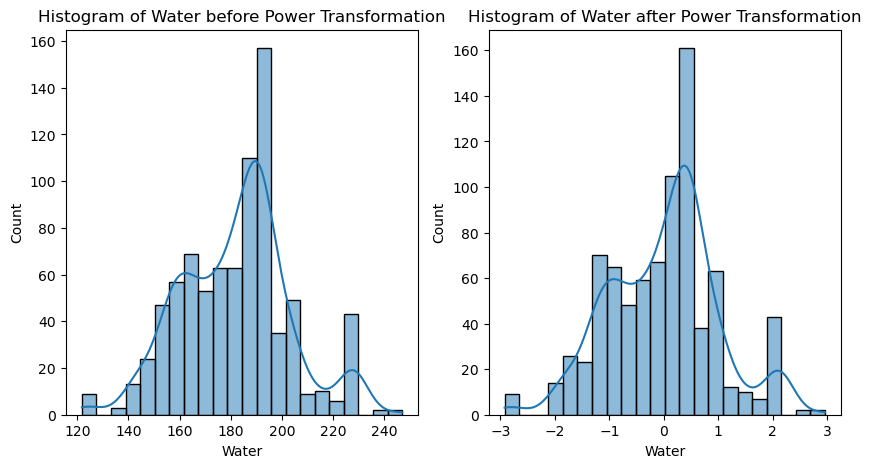

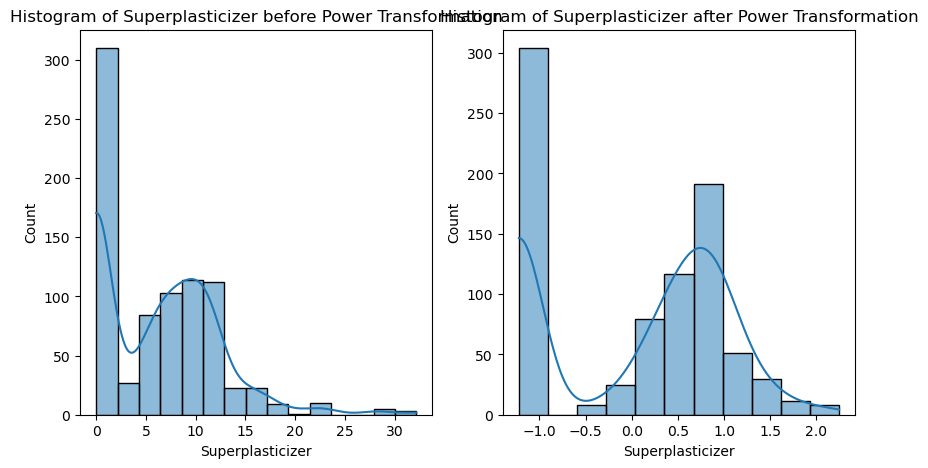

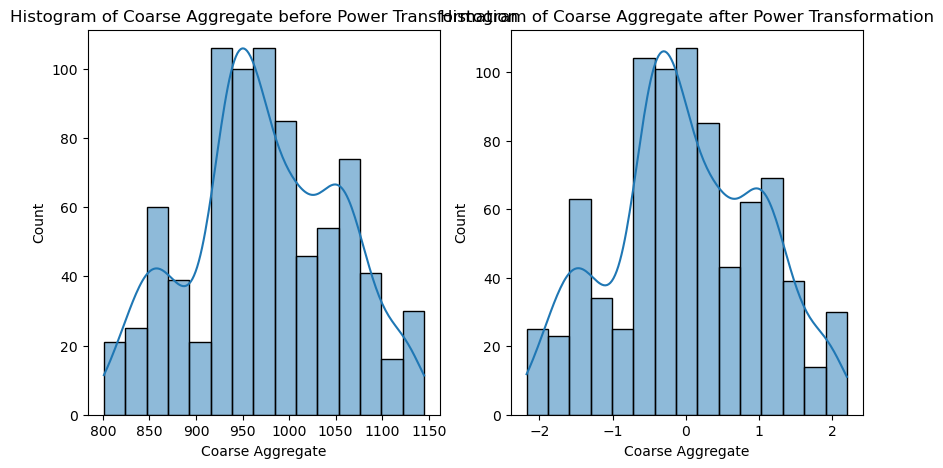

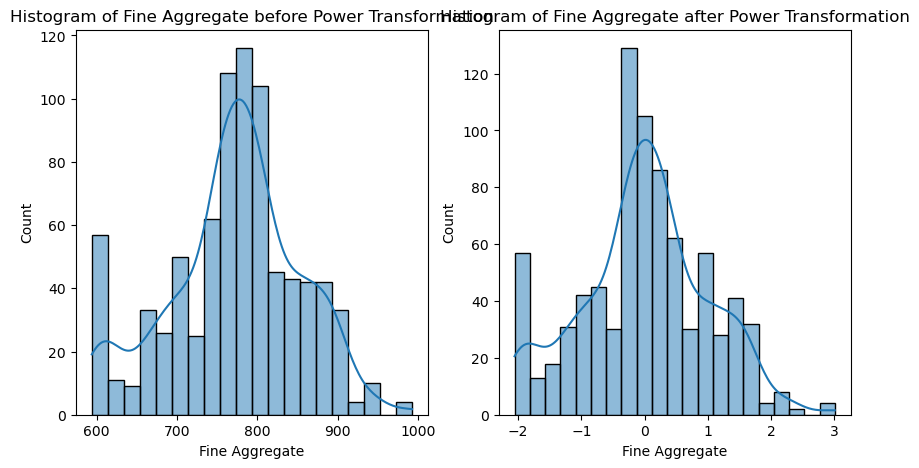

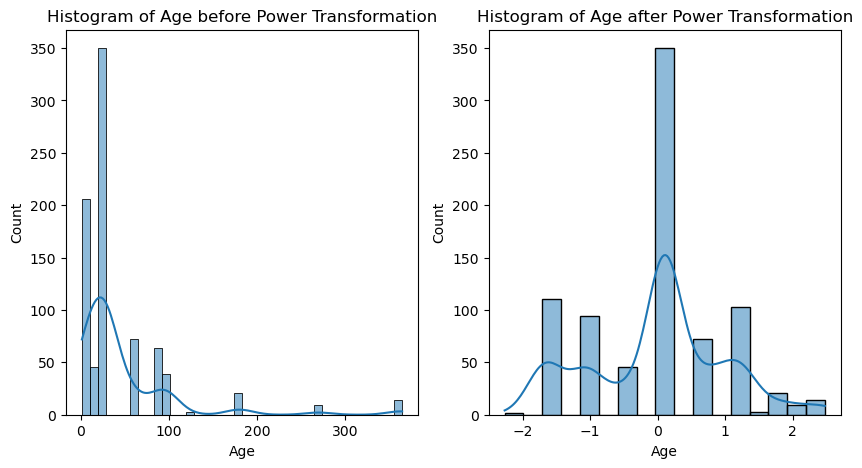

In [76]:
# before and after transform

X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)

for col in X_train_transformed2.columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Histogram of {col} before Power Transformation')

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col], kde=True)
    plt.title(f'Histogram of {col} after Power Transformation')

    plt.show()